# 0. Importación de librerías 

En las siguientes líneas de código se importan las librerías y herramientas necesarias para desarrollar el caso de uso.

In [1]:
seed = 161
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.impute import SimpleImputer

# Regresion lineal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

# Importar/ Exportar modelos
from joblib import dump, load

# 1. Carga de los datos
A través de la librería **pandas** podemos realizar la carga de datos desde diferentes fuentes de información, en este caso se realizará la carga de un archivo plano csv, el separador del archivo es ; y se remplazaron los valores "-" por valores nulos.

In [2]:
# Se cargan los datos. 
df_datos=pd.read_csv('202210_Laboratorio3_data_DatosTrain.csv', sep=',', encoding = 'utf-8', header=0, na_values=["NA-VALUE"])

In [3]:
# Cantidad de datos y número de variables
df_datos.shape

(2644, 20)

In [4]:
# Mostrar los datos
df_datos.head()

,Unnamed: 0,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
# Podemos ver los tipos de todas la variables.
df_datos.dtypes

Unnamed: 0                           int64
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  10-19 years              float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [6]:
df_datos = df_datos.drop(['Unnamed: 0'], axis=1)

In [7]:
# Y hacer una decsripción de los datos
df_datos.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2644.000000,2644.000000,2644.00000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2.644000e+03,2644.000000,2644.000000,2644.000000,2644.000000
mean,69.068797,162.465204,31.14410,4.328684,792.465552,65.532905,2432.922844,37.662746,43.160363,81.967095,5.431078,81.926626,1.617095,6726.080237,1.052152e+07,4.743911,4.778215,0.602879,11.482678
std,10.351757,121.186953,123.93232,4.146851,2077.768681,39.221347,11868.652439,20.339750,168.485929,24.521529,2.821982,24.502772,4.822150,13873.881462,5.680977e+07,4.467839,4.553418,0.244040,4.170684
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,62.975000,73.000000,0.00000,0.407500,7.044565,14.750000,0.000000,18.900000,0.000000,78.000000,3.677500,78.000000,0.100000,238.626882,1.285900e+04,1.500000,1.500000,0.473000,9.500000
50%,72.100000,143.000000,2.00000,3.225000,70.648787,87.000000,14.000000,43.000000,3.000000,93.000000,5.550000,93.000000,0.100000,1254.652810,6.227965e+05,3.200000,3.200000,0.668000,12.300000
75%,75.800000,226.250000,18.00000,7.495000,485.959559,96.000000,329.750000,55.900000,23.000000,97.000000,7.372500,97.000000,0.800000,5277.746332,5.194999e+06,7.200000,7.300000,0.781000,14.200000
max,89.000000,699.000000,1800.00000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.240000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# 2. Limpieza y preparación de los datos

Primero vamos a ejecutar los pasos de limpieza de los datos, relacionados el tratamiento de ausencias y registros duplicados.

In [8]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
df_datos_t = df_datos

In [9]:
# Se observa que hay ausencias, sin embargo no son una cantidad significativa:
df_datos_t.isnull().sum()

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  10-19 years              0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [10]:
# Eliminación registros con ausencias
df_datos_t = df_datos_t.dropna()
# Eliminación de registros duplicados.
df_datos_t = df_datos_t.drop_duplicates()

In [11]:
df_datos_t.shape

(2644, 19)

In [12]:
(df_datos_t==0).sum()

Life expectancy                      9
Adult Mortality                      9
infant deaths                      803
Alcohol                            177
percentage expenditure             498
Hepatitis B                        519
Measles                            899
BMI                                 34
under-five deaths                  747
Polio                               19
Total expenditure                  208
Diphtheria                          19
HIV/AIDS                             0
GDP                                352
Population                         540
thinness  10-19 years               34
thinness 5-9 years                  34
Income composition of resources    230
Schooling                          141
dtype: int64

In [13]:
#Si juega 16 horas al dia puede lograr maximo 112 horas a la semana
#df_datos_t = df_datos_t[df_datos_t.HoursPerWeek<112]
# El juego tiene 10 años por lo que el maximo de horas posibles son 80640
#df_datos_t = df_datos_t[df_datos_t.TotalHours<80640]
# Nos interesa la información de los jugadores, si la persona no juega no va a tener una liga asignada
#df_datos_t = df_datos_t[df_datos_t.HoursPerWeek>0]
# De acuerdo al diccionario el maximo para la variable Life expectancy es 10
#df_datos_t = df_datos_t[df_datos_t.Life expectancy<11]

In [14]:
# Cantidad de datos y número de variables
df_datos_t.shape

(2644, 19)

# 3. Perfilamiento y entendimiento de los datos

## 3.1 Búsqueda de relaciones entre variables (diagramas de dispersión)

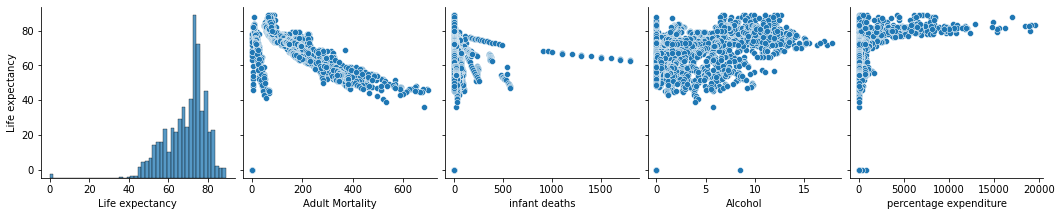

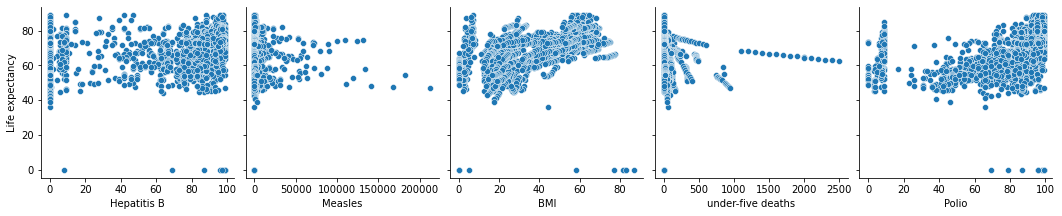

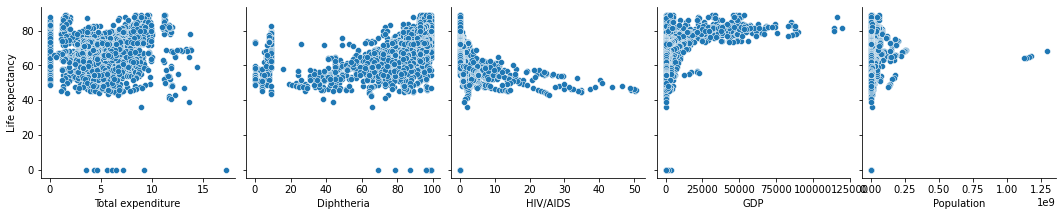

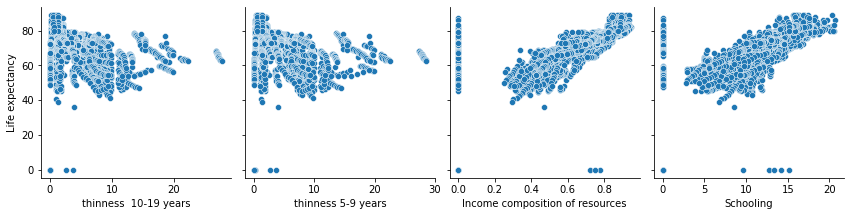

In [15]:
sns.pairplot(df_datos_t, height=3, y_vars = 'Life expectancy', x_vars = df_datos_t.columns[0:5], kind='scatter')
sns.pairplot(df_datos_t, height=3, y_vars = 'Life expectancy', x_vars = df_datos_t.columns[5:10], kind='scatter')
sns.pairplot(df_datos_t, height=3, y_vars = 'Life expectancy', x_vars = df_datos_t.columns[10:15], kind='scatter')
sns.pairplot(df_datos_t, height=3, y_vars = 'Life expectancy', x_vars = df_datos_t.columns[15:], kind='scatter')

De las graficas anteriores vemos que unos buenos candidatos son:

* Adult mortality

* BMI

* Income composition of resources

* Schooling

##  3.2 Búsqueda de relaciones entre variables (Matriz de correlaciones)

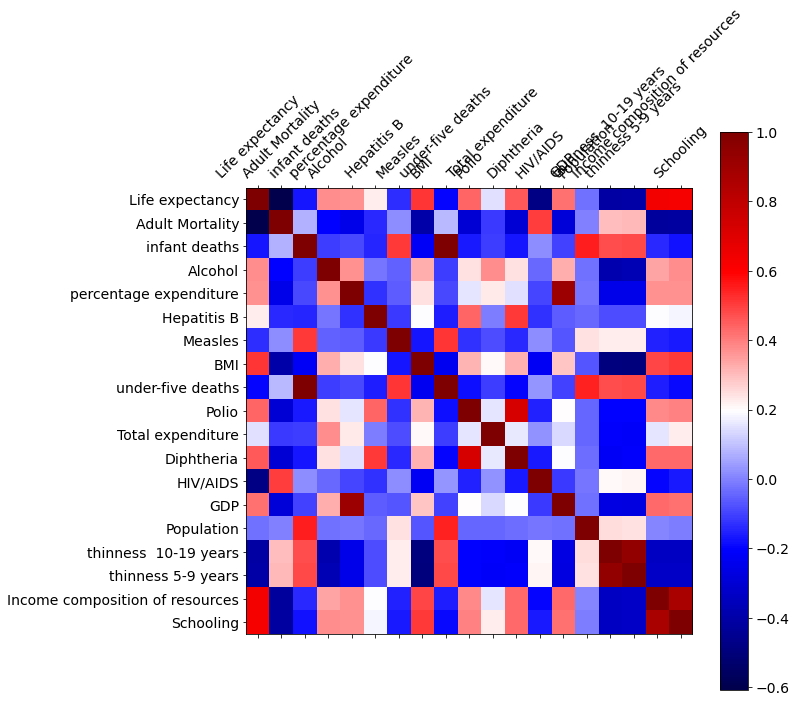

In [16]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df_datos_t.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_datos_t.select_dtypes(['number']).shape[1]), df_datos_t.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_datos_t.select_dtypes(['number']).shape[1]), df_datos_t.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

# Selección de variables del modelo
Para seleccionar las variables del modelo se prueba el desempeño individual de cada una de las variables , midiendo su error cuadratico medio (MSE) y su coeficiente de determinación ajustado (R2).

In [17]:
# Se selecciona la variable objetivo, en este caso "Outcome".
Y = df_datos_t['Life expectancy']
# Del conjunto de datos se elimina la variable "Outcome"
X = df_datos_t.drop(['Life expectancy'], axis=1)

In [18]:
# Dividimos los datos en conjunto de prueba y conjunto de entrenamiento
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print('El conjunto de entrenamiento tiene ' + str(len(X_train.index)) + ' muestras' )
print('El conjunto de prueba tiene ' + str(len(X_test.index)) + ' muestras' )

El conjunto de entrenamiento tiene 2115 muestras
El conjunto de prueba tiene 529 muestras


### Grafica MSE y R2
Resultado del MSE y R2 realizando un entrenamiento y prediccion para cada variable individual 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

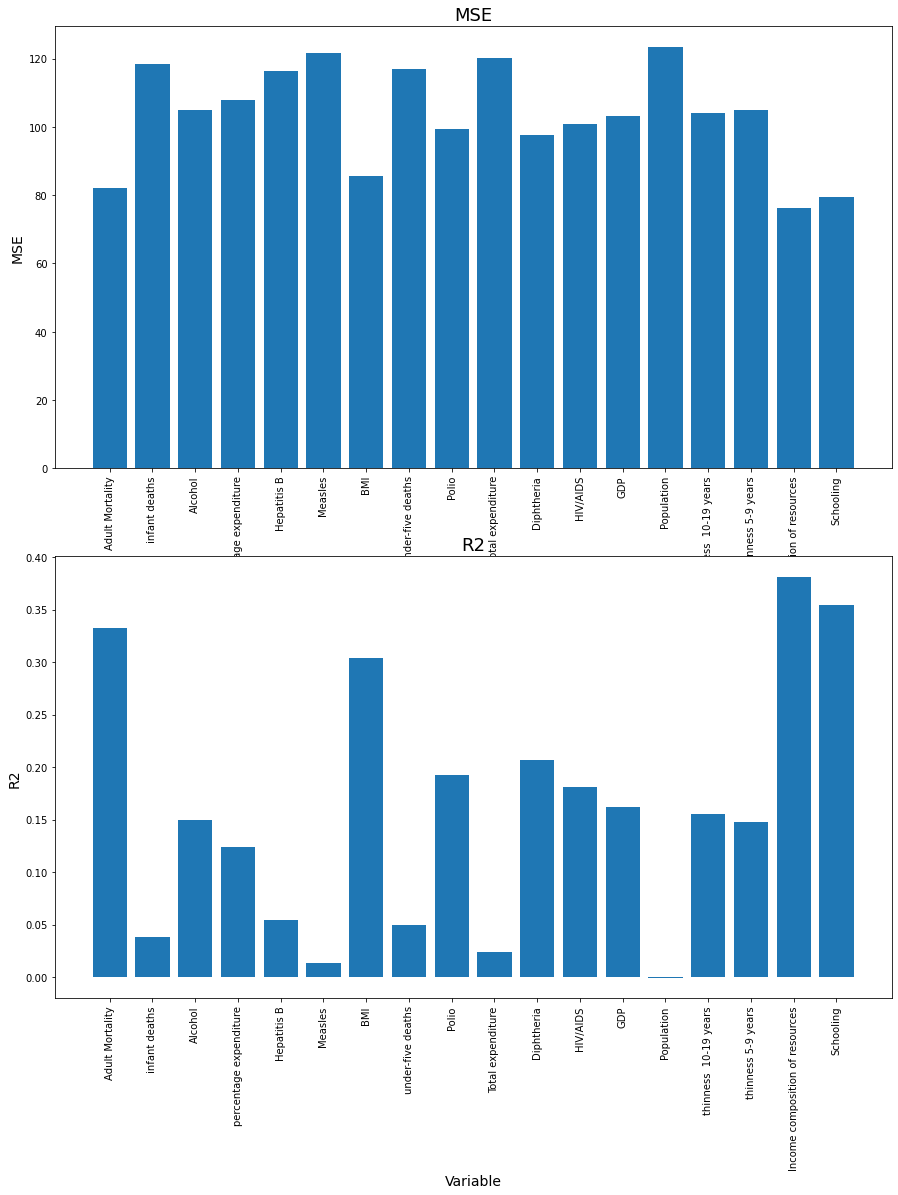

In [19]:
mse_list=[]
score=[]
variables = ['Adult Mortality','infant deaths'
             ,'Alcohol','percentage expenditure','Hepatitis B','Measles'
             ,'BMI','under-five deaths','Polio','Total expenditure','Diphtheria'
             ,'HIV/AIDS','GDP','Population','thinness  10-19 years','thinness 5-9 years'
             ,'Income composition of resources','Schooling']
for i in variables:
  X_temp = X_train[[i]]
  X_temp_test = X_test[[i]]
  
  model = LinearRegression()
  model.fit(X_temp, Y_train)

  y_pred = model.predict(X_temp_test)
  score.append(model.score(X_temp_test, Y_test))
  mse_list.append(mse(Y_test, y_pred))


fig = plt.figure(figsize=(15,20))
fig.subplots_adjust(top=0.8)

ax1 = fig.add_subplot(211)
ax1.set_ylabel('MSE', fontsize=14)
ax1.set_xlabel('Variable', fontsize=14)
ax1.set_title('MSE', fontsize=18)
ax1.bar(variables,mse_list, align='center')
plt.xticks(rotation=90)

ax2 = fig.add_subplot(212)
ax2.set_ylabel('R2', fontsize=14)
ax2.set_xlabel('Variable', fontsize=14)
ax2.set_title('R2', fontsize=18)
ax2.bar(variables,score, align='center')
plt.xticks(rotation=90)

### Linealidad
Se plotea el modelo lineal que se obtiene al usar solo una variable del conjunto de datos

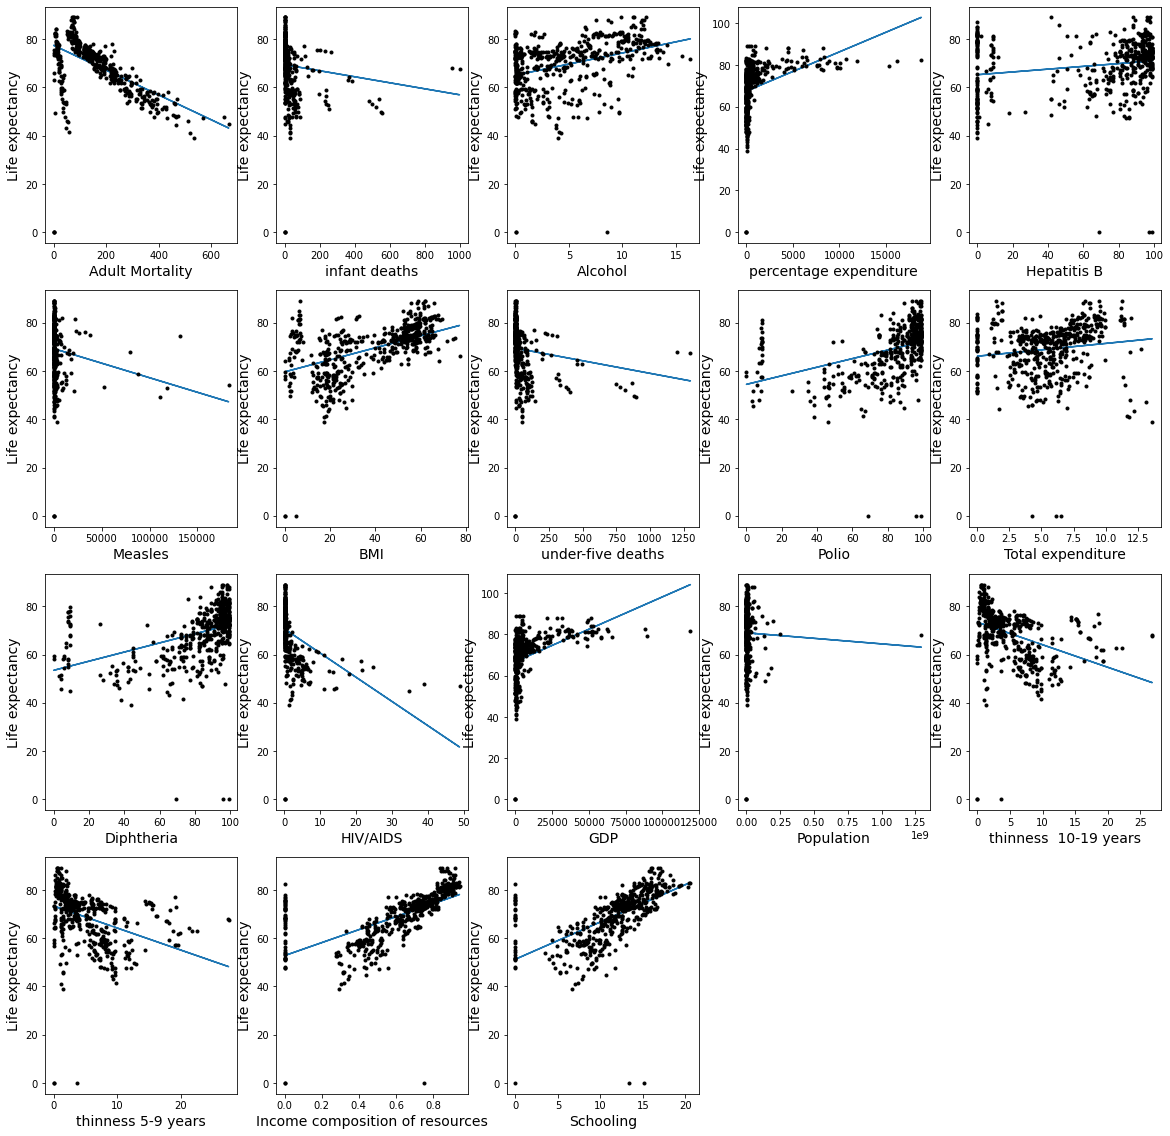

In [20]:
i = 0
for var in variables:
    i += 1
    X_temp = X_train[[var]]
    X_test_temp = X_test[[var]]

    model = LinearRegression()
    model.fit(X_temp, Y_train)

    y_pred = model.predict(X_test_temp)
    plt.rcParams['figure.figsize'] = [20, 20]
    plt.subplot(4, 5, i)
    plt.xlabel(var, fontsize=14)
    plt.ylabel("Life expectancy", fontsize=14)
    plt.plot(X_test_temp, y_pred, X_test_temp , Y_test, 'k.')

    
plt.rcParams['figure.figsize'] = [6.4, 4.8]

# Modelos

Para modelar el comportamiento de los datos y poder sacar predicciones se usa un modelo de regresión lineal. La regresión Lineal busca una aproximación con coeficientes $\beta$ = [ $\beta_1$, $\dots$, $\beta_n$] que minimizen el error cuadratico medio entre los datos observados y la predicción modelada por una aproximación lineal.Para modelar el comportamiento de los datos y poder sacar predicciones se usa un modelo de regresión lineal. La regresión Lineal busca una aproximación con coeficientes $\beta$ = [ $\beta_1$, $\dots$, $\beta_n$] que minimizen el error cuadratico medio entre los datos observados y la predicción modelada por una aproximación lineal.

In [21]:
def transformacion(x):
    return x**0.5

In [22]:
def create_pipe(selected_cols_p, transform=False):
    pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols_p)])),]

    na_cleanup = [('na_cleanup', SimpleImputer(strategy="median")),]

    std = [('std_scaler', StandardScaler()),]

    m = [('model', LinearRegression()),]
    
    transformer = [("transformer",FunctionTransformer(transformacion)),]
    
    if transform:
        pipeline = Pipeline(pre+na_cleanup+transformer+std+m)
    else:
        pipeline = Pipeline(pre+na_cleanup+std+m)
    pipeline = pipeline.fit(X_train, Y_train)
    return pipeline

### Modelo 1.1
Los parametros se seleccionan de acuerdo a la seccion anterior, para el primer modelo se toman las 11 variables que tienen menor error cuadratico medio

In [23]:
selected_cols=[]

for i in range(0, 6):
  minimo=10000
  act=""
  for j in range (0,len(mse_list)):
    if mse_list[j]<minimo and variables[j] not in selected_cols:
      minimo=mse_list[j]
      act=variables[j]
  selected_cols.append(act)
print('Las variables seleccionadas son: ')
for v in selected_cols:
  print('', f'* {v.strip()}')

Las variables seleccionadas son: 
 * Income composition of resources
 * Schooling
 * Adult Mortality
 * BMI
 * Diphtheria
 * Polio


In [24]:
pipe = create_pipe(selected_cols)

In [25]:
print("R2: ",pipe.score(X_test, Y_test))
print("ECM: " , mse(Y_test, pipe.predict(X_test)))

R2:  0.5612481289761835
ECM:  54.035867216999776


### Modelo 1.2
Para el modelo 1.2 se tomaron las variables con mayor coeficiente de determinación ajustado (R2)

In [26]:
selected_cols=[]

for i in range(0, 8):
  maxi=0
  act=""
  for j in range (0,len(score)):
    if score[j]>maxi and variables[j] not in selected_cols:
      maxi=score[j]
      act=variables[j]
  selected_cols.append(act)

print('Las variables seleccionadas son: ')
for v in selected_cols:
  print('', f'* {v.strip()}')

Las variables seleccionadas son: 
 * Income composition of resources
 * Schooling
 * Adult Mortality
 * BMI
 * Diphtheria
 * Polio
 * HIV/AIDS
 * GDP


In [27]:
pipe = create_pipe(selected_cols)

In [28]:
print("R2: ",pipe.score(X_test, Y_test))
print("ECM: " , mse(Y_test, pipe.predict(X_test)))

R2:  0.5886629985260667
ECM:  50.65950269617829


### Modelo 1.3
Para el modelo 1.3 se realizan transformaciones sobre los datos de entrada

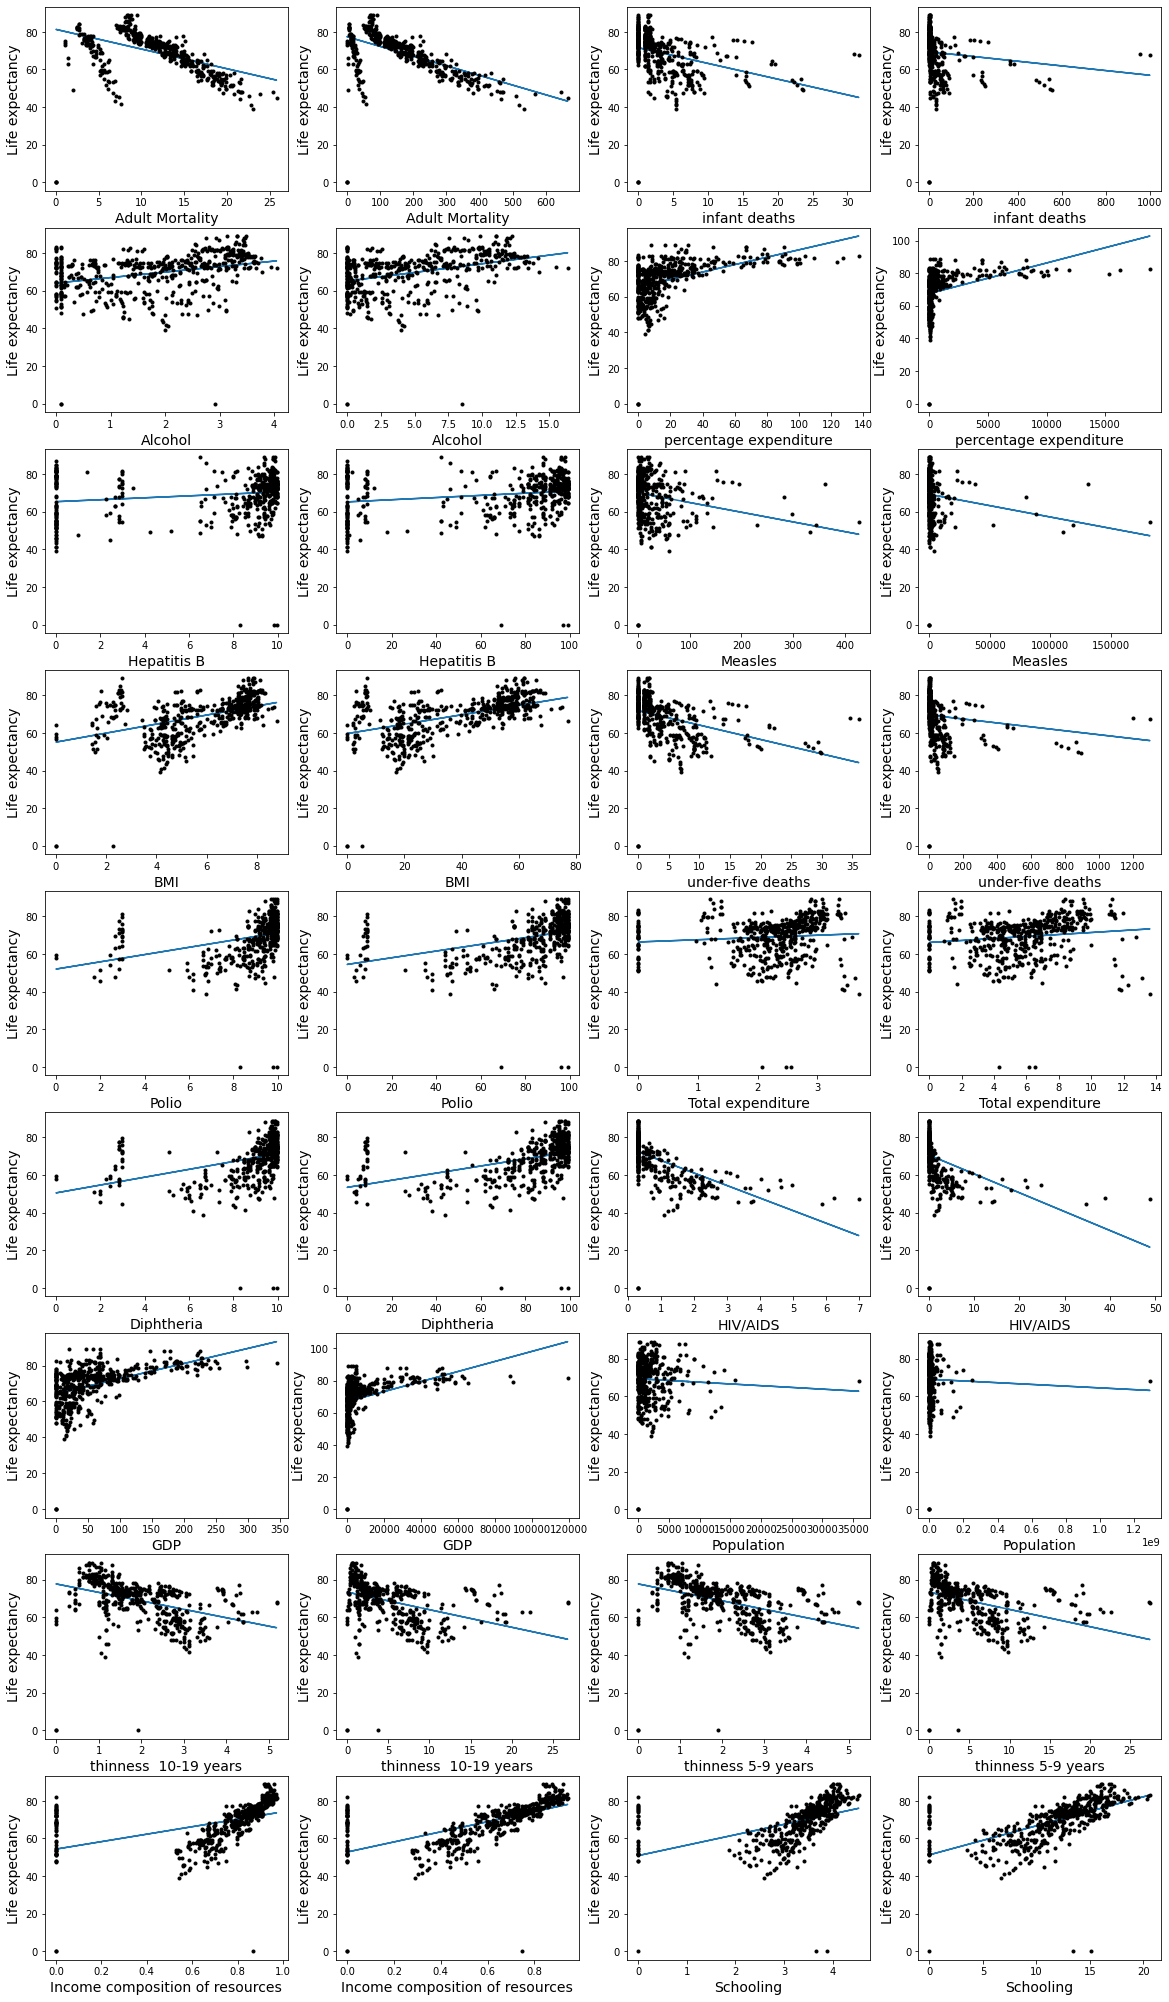

In [29]:
variables = ['Adult Mortality','infant deaths'
             ,'Alcohol','percentage expenditure','Hepatitis B','Measles'
             ,'BMI','under-five deaths','Polio','Total expenditure','Diphtheria'
             ,'HIV/AIDS','GDP','Population','thinness  10-19 years','thinness 5-9 years'
             ,'Income composition of resources','Schooling']
i = 0
for var in variables:
    i += 1
    X_temp = X_train[[var]]**0.5
    X_test_temp = X_test[[var]]**0.5
  
    
    model = LinearRegression()
    model.fit(X_temp, Y_train)

    y_pred = model.predict(X_test_temp)
    
   
    
    plt.rcParams['figure.figsize'] = [20, 40]
    plt.subplot(10, 4, i)
    plt.xlabel(var, fontsize=14)
    plt.ylabel("Life expectancy", fontsize=14)
    plt.plot(X_test_temp, y_pred, X_test_temp , Y_test, 'k.')
    
    
    
    
    i += 1
    
    X_temp =X_train[[var]]
    X_test_temp =X_test[[var]]
    model = LinearRegression()
    model.fit(X_temp, Y_train)

    y_pred = model.predict(X_test_temp)
    plt.rcParams['figure.figsize'] = [20, 20]
    plt.subplot(10, 4, i)
    plt.xlabel(var, fontsize=14)
    plt.ylabel("Life expectancy", fontsize=14)
    plt.plot(X_test_temp, y_pred, X_test_temp , Y_test, 'k.')
    
plt.rcParams['figure.figsize'] = [6.4, 4.8]

In [30]:
mse_list=[]
score=[]
variables = ['Income composition of resources', 'Schooling', 'Adult Mortality'
             , 'BMI', 'Diphtheria', 'Polio', 'HIV/AIDS', 'GDP']
variables=['infant deaths'
             ,'Alcohol','percentage expenditure','Hepatitis B','Measles'
             ,'under-five deaths','Total expenditure'
             ,'Population','thinness  10-19 years','thinness 5-9 years'
             ]
pipe = create_pipe(variables, transform=True)
print("R2: ",pipe.score(X_test, Y_test))
print("ECM: " , mse(Y_test, pipe.predict(X_test)))



R2:  0.45489203021908287
ECM:  67.1344872109071


# Exportar e Importar el Modelo

In [31]:
df_recent=pd.read_csv('202210_Laboratorio3_data_datos_recientes.csv', sep=',', encoding = 'utf-8', header=0, na_values=["NA-VALUE"])

In [32]:
df_recent.shape

(294, 19)

In [33]:
 # Usamos la lbreria joblib
filename = 'pipeline.joblib'
# Se guarda
dump(pipeline, filename)   # Se lee
p2 = load(filename)

p2  # Clasificamos los datos recientes
df_recent['Life expectancy'] = p2.predict(df_recent)  
sns.histplot(df_recent['Life expectancy'])

NameError: name 'pipeline' is not defined

# Coeficientes

In [ ]:
pipeline['model'].coef_  # En DataFrame
pd.DataFrame({'columns':selected_cols, 'coef':pipeline['model'].coef_})